In [1]:
import skimage
import numpy as np
import dicom
import os
import dicom_numpy

In [2]:
input_folder = './Sampdata/SE5/'
patients = os.listdir(input_folder)
patients.sort()
lstDCM = []

In [3]:
def load_scan(dir):
    for dirName,subdirList, fileList in os.walk(dir):
        for filename in fileList:
            lstDCM.append(os.path.join(dirName,filename))
    return lstDCM 


In [4]:
first_patient = load_scan(input_folder)
refDS = dicom.read_file(lstDCM[0])
pixel_dim = (int(refDS.Rows),int(refDS.Columns),int(len(lstDCM)))
print(pixel_dim)
pixel_spacing = (float(refDS.PixelSpacing[0]),float(refDS.PixelSpacing[1]),float(refDS.SliceThickness))
print(pixel_spacing)
x = np.arange(0.0,(pixel_dim[0]+1)*(pixel_spacing[0]),pixel_spacing[0])
y = np.arange(0.0,(pixel_dim[1]+1)*(pixel_spacing[1]),pixel_spacing[1])
z = np.arange(0.0,(pixel_dim[2]+1)*(pixel_spacing[2]),pixel_spacing[2])

array_dicom = np.zeros(pixel_dim,dtype = refDS.pixel_array.dtype)
for filename in lstDCM:
    da = dicom.read_file(filename)
    array_dicom[:,:,(int(da.InstanceNumber)-1)] = da.pixel_array


(512, 512, 187)
(0.4375, 0.4375, 1.0)


In [5]:
array_dicom.shape

(512, 512, 187)

In [9]:
import matplotlib.pyplot as plt

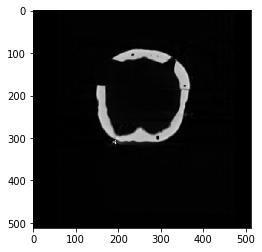

In [13]:
plt.imshow((array_dicom[:,:,150]), cmap='gray')

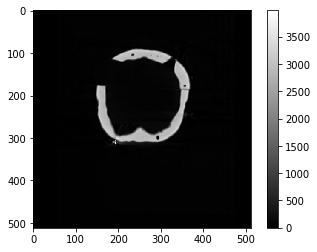

In [12]:
plt.show()

In [10]:
import sys
sys.path.append('/home/shwetank/vtkBuild/lib/python3.5/site-packages')
sys.path.append('/home/shwetank/vtkBuild/lib/python3.5/site-packages')
import vtk

In [13]:
PathDicom = "./Sampdata/SE5/"
reader  = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

In [14]:
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1,_extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]
ConstPixelSpacing = reader.GetPixelSpacing()
print(ConstPixelDims)
print(ConstPixelSpacing)
print(reader.GetRescaleSlope())
print(reader.GetRescaleOffset())

[512, 512, 187]
(0.4375, 0.4375, 0.9999923706054688)
1.0
-1024.0


In [10]:
array_dcm = array_dicom*(reader.GetRescaleSlope()) + (reader.GetRescaleOffset())

NameError: name 'reader' is not defined

In [11]:
plt.imshow((array_dcm[:,:,150]), cmap='gray',vmin = 200,vmax = 500)
plt.colorbar()

NameError: name 'array_dcm' is not defined

In [12]:
plt.show()

In [10]:
from skimage import morphology as morph

In [ ]:
tophat = morph.white_tophat(array_dicom,morph.ball(8))

In [15]:
plt.imshow(tophat[:,:,175], cmap='gray')

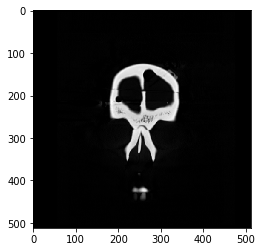

In [16]:
plt.show()

In [12]:
vmin = 200
vmax = 500
dat = np.clip(array_dicom, vmin, vmax)
dat = (dat - vmin) / (vmax - vmin)


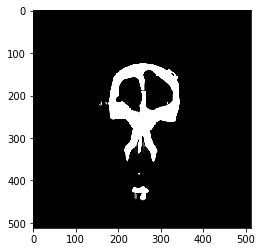

In [13]:
plt.imshow(dat[:,:,175], cmap='gray')
plt.show()

In [6]:
from skimage import morphology
open_object = morphology.opening(dat, morphology.ball(3))



NameError: name 'dat' is not defined

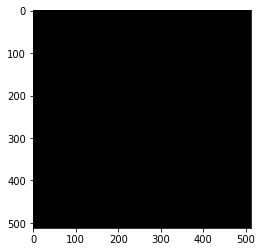

In [15]:
plt.imshow(open_object[:,:,165], cmap='gray')
plt.show()

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

In [15]:
init_notebook_mode(connected = True)
array_dicom[146,330,21] = 3000

In [16]:
das = [go.Heatmap(z = ((array_dicom[:,:,21])))]
iplot(das, filename='Heatmap')

In [7]:
result = (array_dicom < 1600) * array_dicom
result = (result > 1100) * result

In [8]:
trace2 = go.Heatmap(z = np.flipud(result[:,:,9]))
data2 = [trace2]
iplot(data2, filename = 'basic-heatmap')

NameError: name 'go' is not defined

In [15]:
from skimage import morphology as morph
from skimage import restoration

In [ ]:
#bilateral = restoration.denoise_tv_chambolle(result,weight = 0.1)

In [25]:
#trace3 = go.Heatmap(z = np.flipud(tophat1[:,:,175]))
#data3 = [trace3]
#iplot(data3, filename = 'basic-heatmap')

In [12]:
from skimage.filters import threshold_otsu
thres_min = threshold_otsu(result)
boolean_binary = (result > thres_min)
binary = 1 * boolean_binary

In [18]:
thresh = go.Heatmap(z = np.flipud(array_dicom[:,:,60]))
block = [thresh]
iplot(block,filename='basic-heatmap')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [27]:
from scipy import ndimage
import warnings

In [113]:

#with warnings.catch_warnings():
#    warnings.simplefilter("ignore")
#    erode = 1*(morph.remove_small_holes(binary, 1600,connectivity = result.ndim))

In [30]:
#filled = go.Heatmap(z = np.flipud(erode[:,:,175]))
#k = [filled]
#iplot(k,filename = 'basic-heatmap')

In [32]:
#plt.imshow(filled_i[:,:,175], cmap = 'gray')

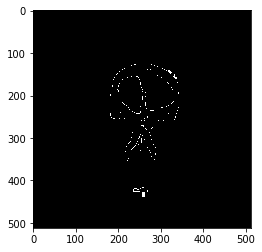

In [76]:
plt.show()

In [10]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [11]:
def sitk_show(img, title = None, margin = 0.05, dpi = 40):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin)*nda.shape[0] / dpi, (1+ margin)* nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0],0)
    fig = plt.figure(figsize = figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1-2*margin, 1-2*margin])
    
    plt.set_cmap("gray")
    ax.imshow(nda,extent = extent, interpolation = None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [12]:
labelFid = 1
labelBack = 2

In [13]:
reader = sitk.ImageSeriesReader()
filenamesDICOM = reader.GetGDCMSeriesFileNames('./TestData/')
reader.SetFileNames(filenamesDICOM)
imgOriginal  =reader.Execute()

In [20]:
img = imgOriginal[:,34,:]

In [21]:
sitk_show(img)

In [155]:
imgSmooth = sitk.CurvatureFlow(image1 = imgOriginal,timeStep = 0.125, numberOfIterations= 5)

In [53]:
sitk_show(imgSmooth[:,:,21])

NameError: name 'imgSmooth' is not defined

In [102]:
seeds = [(512-122-17,512-352-17,42+17)]

In [103]:
seeds_im2 = sitk.Image(imgOriginal)

In [1]:
for s in seeds:
    seeds_im2[s] = 10000

NameError: name 'seeds' is not defined

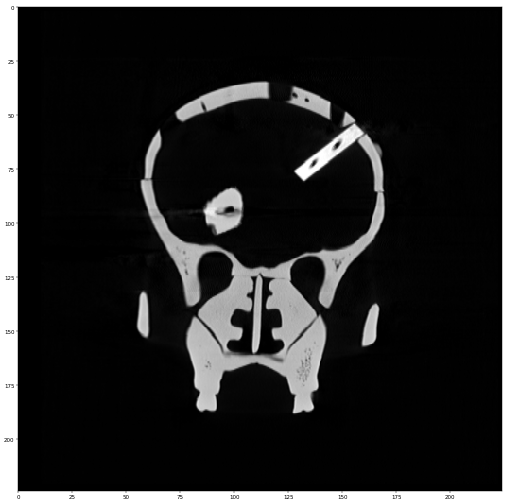

In [120]:
sitk_show(seeds_im2[:,:,48])

In [197]:
imgSeg = sitk.ConfidenceConnected(image1 = imgSmooth,seedList = [(330,146,22),(325,145,21)],numberOfIterations=7,multiplier=1.0, replaceValue=labelFid)

In [198]:
imgSmoothInt = sitk.Cast(sitk.RescaleIntensity(imgSmooth),imgSeg.GetPixelID())

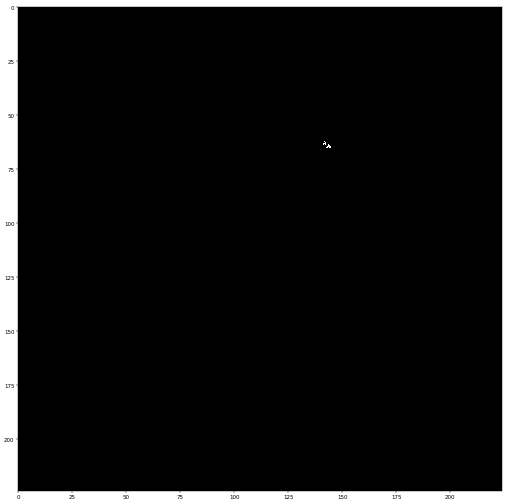

In [199]:
sitk_show((imgSeg[:,:,21]))

In [235]:
imgSmooth[407,131]

113.51398491962476

In [148]:
imgSeg[330,146,22]

1

In [243]:
imgSeg_NoHoles = sitk.VotingBinaryHoleFilling(image1 = imgSeg,radius = [1]*8,majorityThreshold=1,backgroundValue=0,foregroundValue = labelFid)

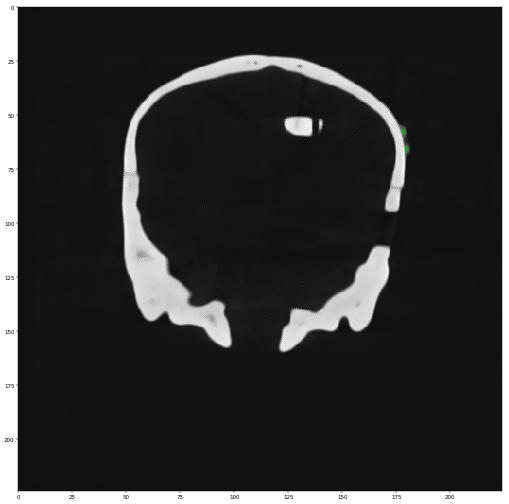

In [244]:
sitk_show(sitk.LabelOverlay(imgSmoothInt,imgSeg_NoHoles))

In [261]:
stats = sitk.LabelIntensityStatisticsImageFilter()

In [262]:
stats.Execute(imgSeg,imgSmooth)

In [263]:
m = stats.GetCentroid(stats.GetLabels()[0])

In [264]:
r = sitk.Image.TransformPhysicalPointToContinuousIndex(imgSmooth,m)

In [267]:
m

(31.715163934426215, -48.51946721311475, 2386.8912987630874)

In [98]:
re = dicom.read_file(lstDCM[8])

In [99]:
re.ImageOrientationPatient

['0.9987699389', '0.04958432168', '0', '0', '0', '-1']

In [ ]:
['0.9987699389', '0.04958428815', '0', '0', '0', '-1']

In [100]:
['0.9987699389', '0.0495842509', '0', '0', '0', '-1']

['0.9987699389', '0.0495842509', '0', '0', '0', '-1']

In [101]:
['0.9987699389', '0.04958432168', '0', '0', '0', '-1']

['0.9987699389', '0.04958432168', '0', '0', '0', '-1']

In [134]:
f = imgOriginal.GetDirection()

In [221]:
k = imgOriginal.GetSpacing()

In [268]:
l = imgOriginal.GetOrigin()

In [269]:
l

(-112.0, -112.0, -121.4375)

()

In [67]:
imgOriginal.GetWidth()

512

In [ ]:
fileNames